In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

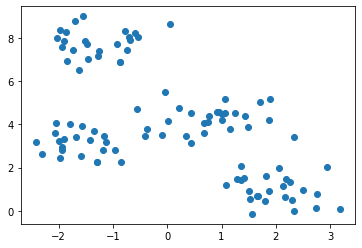

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
WCSS = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

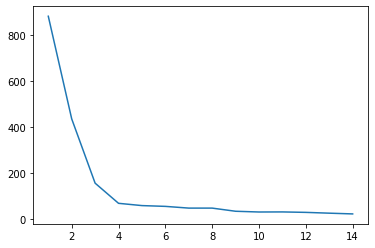

In [6]:
plt.plot(range(1,15),WCSS)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=1)
kmeans.fit_predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [8]:
h = 0.1
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()

In [9]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

In [10]:
print(Z)
print(xx)

[1 1 1 ... 2 2 2]
[[-2.42165857 -2.32165857 -2.22165857 ...  2.97834143  3.07834143
   3.17834143]
 [-2.42165857 -2.32165857 -2.22165857 ...  2.97834143  3.07834143
   3.17834143]
 [-2.42165857 -2.32165857 -2.22165857 ...  2.97834143  3.07834143
   3.17834143]
 ...
 [-2.42165857 -2.32165857 -2.22165857 ...  2.97834143  3.07834143
   3.17834143]
 [-2.42165857 -2.32165857 -2.22165857 ...  2.97834143  3.07834143
   3.17834143]
 [-2.42165857 -2.32165857 -2.22165857 ...  2.97834143  3.07834143
   3.17834143]]


In [11]:
Z = Z.reshape(xx.shape)

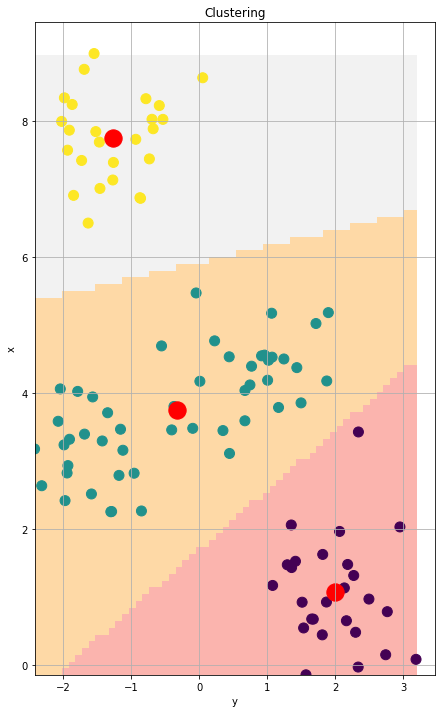

In [12]:
plt.figure(1 , figsize = (25 , 12) )
plt.clf()
 
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, origin='lower')
 
plt.scatter(x=X[:,0], y=X[:,1], c=labels, s=100)
 
plt.scatter(x=centroids[:,0], y=centroids[:,1],s=300 , c='red')
 
plt.ylabel('x') , plt.xlabel('y')
plt.grid()
plt.title("Clustering")
plt.show()